In [27]:
#SMOTE (Synthetic Minority Oversampling Technique) for imbalanced classes
# Source: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# check version number
from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

First, we can use the make_classification() scikit-learn function to create a synthetic binary classification dataset with 10,000 examples and a 1:100 class distribution.

We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

Finally, we can create a scatter plot of the dataset and color the examples for each class a different color to clearly see the spatial nature of the class imbalance.

In [32]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


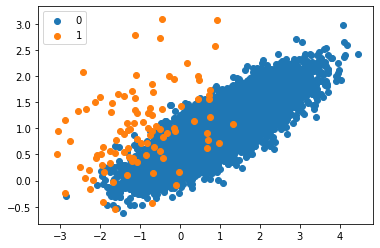

In [33]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the dataset is created showing the large mass of points that belong to the majority class (blue) and a small number of points spread out for the minority class (orange). We can see some measure of overlap between the two classes.

Next, we can oversample the minority class using SMOTE and plot the transformed dataset.

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

For example, we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

Counter({0: 9900, 1: 9900})


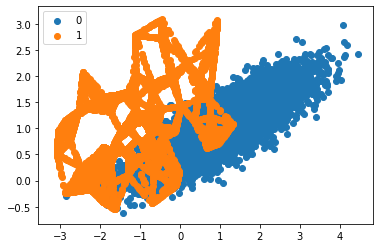

In [34]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes; 

In [39]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.